In [65]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# !pip install seaborn
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# 1) Loading the Data

In [88]:
df = pd.read_csv("data_clean_1_panama.csv")

# 2) Data Preprosecing

In [89]:
df.head()

,add_title,add_price,add_area,add_room,add_loc
0,Ocean_House_en_Santa_Mar_a,287000.00000,86.84000,2,Costa del Este
1,Coco_Place_en_Coco_del_Mar__San_Francisco,227000.00000,83.75000,2,Coco del Mar
2,Armon_a_en_Cinta_Costera,124500.00000,45.24000,1,Avenida Balboa
3,The_Rivage_Ave__Balboa_Cinta_Costera,369000.00000,176.00000,2,Avenida Balboa
4,espectacular_Apartment_for_sale_in_Ph_Aqualina...,724000.00000,315.00000,3,Punta Pacífica


In [90]:
# drop unnamed column which is just index this is not necesary, also the title does not add any info
df = df.drop(["add_title", ], axis=1)

In [91]:
# number of features was reduced
df.shape

(12307, 4)

In [92]:
# eval the data
df.describe()

,add_price,add_area,add_room
count,12289.00000,12252.00000,12307.00000
mean,573535.37897,293.04332,2.64207
std,12198610.54223,5107.78717,0.78877
min,0.01000,0.12000,1.00000
25%,185000.00000,98.00000,2.00000
50%,290000.00000,151.00000,3.00000
75%,500000.00000,244.00000,3.00000
max,1100000000.00000,420000.00000,7.00000


Above there are outliers min and max values are way too high or low, same for teh area

In [93]:
# filter the outliers shown above, after some iterations the values below (for flitering) seem more realistic
df=df.loc[(df['add_price'] < 100000000.00000) & (df['add_price'] > 10000) & (df['add_area'] < 1000.00000) & (df['add_area'] > 20)]
df.describe()

,add_price,add_area,add_room
count,12080.00000,12080.00000,12080.00000
mean,423384.31247,192.19873,2.63974
std,405182.06504,132.17547,0.78483
min,12000.00000,24.00000,1.00000
25%,185000.00000,98.00000,2.00000
50%,295000.00000,150.69500,3.00000
75%,500000.00000,241.00000,3.00000
max,5650000.00000,980.00000,7.00000


<AxesSubplot:>

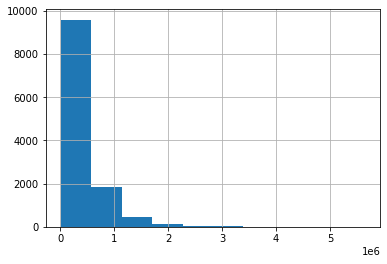

In [94]:
# eval the prices distribution
df.add_price.hist()

Now it makes more sense.

## 2.1) Check for missing values

In [ ]:
df.isnull().sum()

add_price    0
add_area     0
add_room     0
add_loc      0
dtype: int64

In [ ]:
df.dtypes

add_price    float64
add_area     float64
add_room       int64
add_loc       object
dtype: object

# 3) Exploratory Data Anaylsys (EDA)

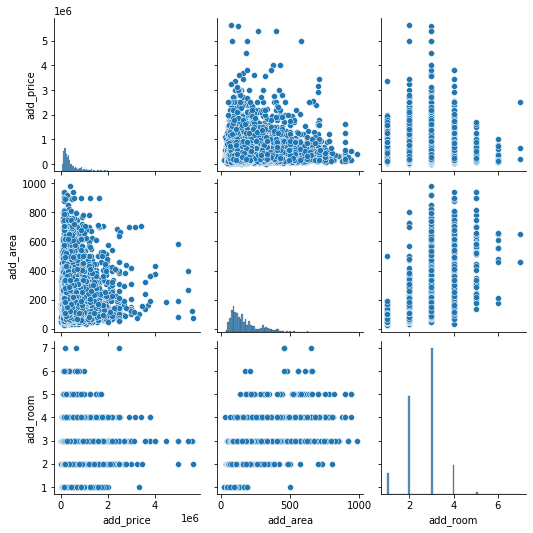

In [ ]:
sns.pairplot(df, )

Rooms seems to be normally distributed while the area and prices seem normally distributed but **possitively skewed**

array([[<AxesSubplot:title={'center':'add_price'}>,
        <AxesSubplot:title={'center':'add_area'}>],
       [<AxesSubplot:title={'center':'add_room'}>, <AxesSubplot:>]],
      dtype=object)

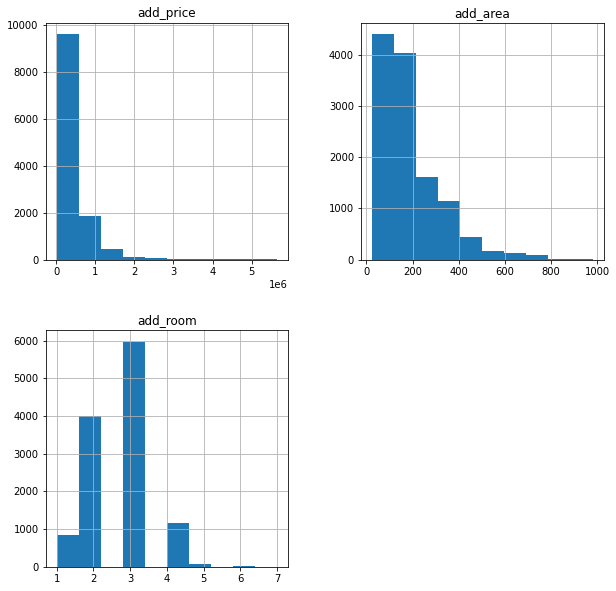

In [ ]:
df.hist(figsize=(10,10),bins=10,)

As mentioned before the data is positevely skewed

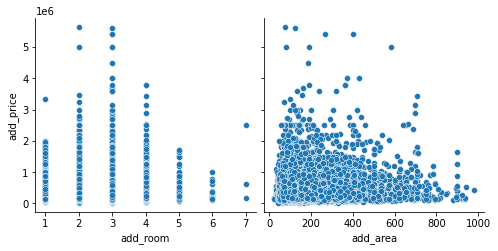

In [ ]:
sns.pairplot(df,x_vars=['add_room','add_area'],y_vars=['add_price'],size=3.5)

<AxesSubplot:>

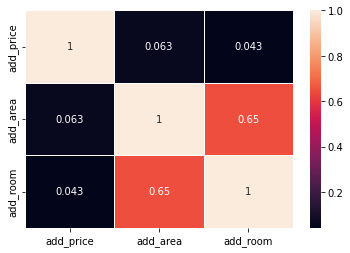

In [ ]:
sns.heatmap(df.corr(),annot=True,lw=1)

As expected the area is **positevely** correlated with the number of rooms (**Posible multicolinearity if both features are selected**). However prices show weak correlation with the number of room or the area. All features are **positevely** correlated to the price.

<AxesSubplot:xlabel='add_room', ylabel='add_price'>

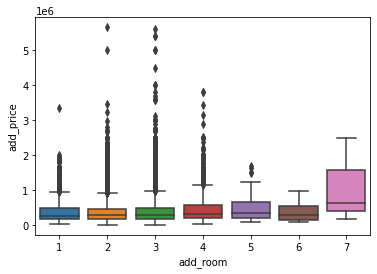

In [ ]:
# eval trend
sns.boxplot(y='add_price',x='add_room',data=df, )

It seems there are many outliers... Should I recolect the data?

# Building a Model
## 4.1) Set Independent Variables (Explanatory Variables $x$)

In [ ]:
df.shape

(12080, 4)

In [ ]:
X = df[["add_area", "add_loc"]] # 'add_area' not used because of multicolinearity (high correlation)

In [ ]:
X.shape #<<<<<<<<<<< fix error on dimensions

(12080, 2)

## 4.2) Get dummy variables 

In [ ]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,add_area,add_loc_24 de Diciembre,add_loc_Albrook,add_loc_Alcalde Díaz,add_loc_Altamira,add_loc_Altos de Golf,add_loc_Altos de Panamá,add_loc_Altos de Santa María,add_loc_Altos del Chase,add_loc_Amador,...,add_loc_Villa Zaita,add_loc_Villa de las Fuentes,add_loc_Vista Hermosa,add_loc_Vía Argentina,add_loc_Vía Brasil,add_loc_Vía Cincuentenario,add_loc_Vía España,add_loc_Vía Porras,add_loc_Vía Tocumen,add_loc_Vía Transístmica
0,86.84000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,83.75000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.24000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.00000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,315.00000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(12080, 109)

## 4.3) Set Target Variable price ($y$)

In [ ]:
y = df["add_price"]

In [ ]:
y.shape

(12080,)

## 4.4) Creating a train and test dataset.

In [ ]:
# ! pip install -U scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7248, 109)
(4832, 109)
(7248,)
(4832,)


## 4.5) Fitting the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# print the intercept
print(model.intercept_)

363518.9422602398


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
add_area,176.21049
add_loc_24 de Diciembre,147974.53430
add_loc_Albrook,54648.67468
add_loc_Alcalde Díaz,714454.74603
add_loc_Altamira,-255545.25397
...,...
add_loc_Vía Cincuentenario,-66374.86797
add_loc_Vía España,-4702.17799
add_loc_Vía Porras,24520.02462
add_loc_Vía Tocumen,-142670.71704


## 4.6) Eval Predictions 

In [ ]:
predictions = model.predict(X_test)
predictions

array([413065.18786643, 425873.95387392, 450035.88828836, ...,
       425745.32021353, 410183.43499692, 418541.41183948])

<AxesSubplot:xlabel='add_price'>

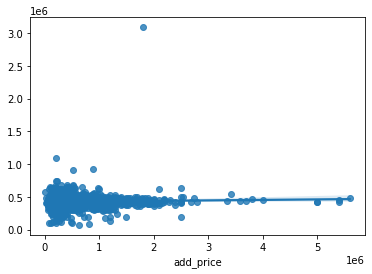

In [ ]:
sns.regplot(y_test,predictions)#.set(ylim=(-100000, 10000000))

Very bad prediction. The model is predicting negative prices which is not the case

In [ ]:
# !pip install statsmodels

# 6) Aditional Check for Linear Regression

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              add_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.904
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.39e-07
Time:                        19:19:22   Log-Likelihood:            -1.0385e+05
No. Observations:                7248   AIC:                         2.079e+05
Df Residuals:                    7145   BIC:                         2.086e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Above results are really bad. **we have to come with something better**. Rescaling the prices may be an option or the area as well. Also we can do some normalization of the target variable. Furtheremore the use of such large number of dummy variables may be an issue as well. Try doing some sectorization.

## 6.1) Additional Check using Area Only

In [ ]:
X = df["add_area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7248, 1)
(4832, 1)
(7248, 1)
(4832, 1)


## 6.2) Refit the model using Area only

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
predictions = model.predict(X_test)
predictions

array([[407082.55038884],
       [414867.23479597],
       [431859.45372067],
       ...,
       [414734.24112367],
       [423280.45094203],
       [407993.46595251]])

<AxesSubplot:>

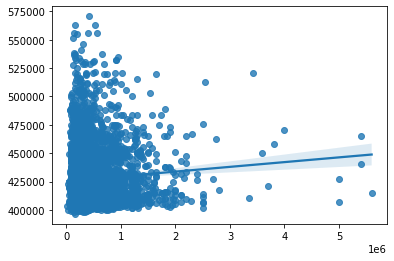

In [ ]:
sns.regplot(y_test,predictions)

Using area only performs better

# Data Regularization, Reclasification, Rescaling, Normalization (Feature Scaling)
## A) Separating the Data by Luxury, Midium, Cheap apartments

In [86]:
def label_class (row):
    """ Labels the data according to the price. The following classes are label:
     - Low
     - Medium
     - High
     - Luxury
    """
    lb = 140000
    mb = 200000
    ub = 300000
    if row['add_price'] <= lb:
        return 'Low'
    elif row['add_price'] > lb and row["add_price"] <= mb:
        return 'Medium'
    elif row['add_price'] > mb and row["add_price"] < ub:
        return 'High'
    else:
        return 'Luxury'

In [121]:
df_1 = df.copy()
df_1.apply (lambda row: label_class(row), axis=1)

0          High
1          High
2           Low
3        Luxury
4        Luxury
          ...  
12284    Luxury
12285    Luxury
12286    Medium
12287      High
12288    Medium
Length: 12080, dtype: object

In [122]:
df_sectorized = df_1
# add new column
df_sectorized["add_class"] = df.apply (lambda row: label_class(row), axis=1)

In [123]:
df_sectorized.head()

,add_price,add_area,add_room,add_loc,add_class
0,287000.00000,86.84000,2,Costa del Este,High
1,227000.00000,83.75000,2,Coco del Mar,High
2,124500.00000,45.24000,1,Avenida Balboa,Low
3,369000.00000,176.00000,2,Avenida Balboa,Luxury
4,724000.00000,315.00000,3,Punta Pacífica,Luxury


In [124]:
# If evaluating the places, there are can be all classes in the same location. Therefore add_loc can be dropped
df_sectorized.loc[(df_sectorized["add_class"] == "Luxury")]["add_loc"].unique().shape

(100,)

## B) Rescaling target Variable to thousands

In [125]:
def price_in_K(row):
    '''divide the target value by 1 thousand.
    '''
    row_k = row["add_price"]/1000
    return row_k

In [126]:
df_sectorized["add_price"] = df_sectorized.apply(lambda row: price_in_K(row), axis=1)
df_sectorized.describe()

,add_price,add_area,add_room
count,12080.00000,12080.00000,12080.00000
mean,423.38431,192.19873,2.63974
std,405.18207,132.17547,0.78483
min,12.00000,24.00000,1.00000
25%,185.00000,98.00000,2.00000
50%,295.00000,150.69500,3.00000
75%,500.00000,241.00000,3.00000
max,5650.00000,980.00000,7.00000


In [112]:
# df_sect_clean = df_sectorized.drop(["add_room", "add_loc"], axis=1) #### Not nedded for sns

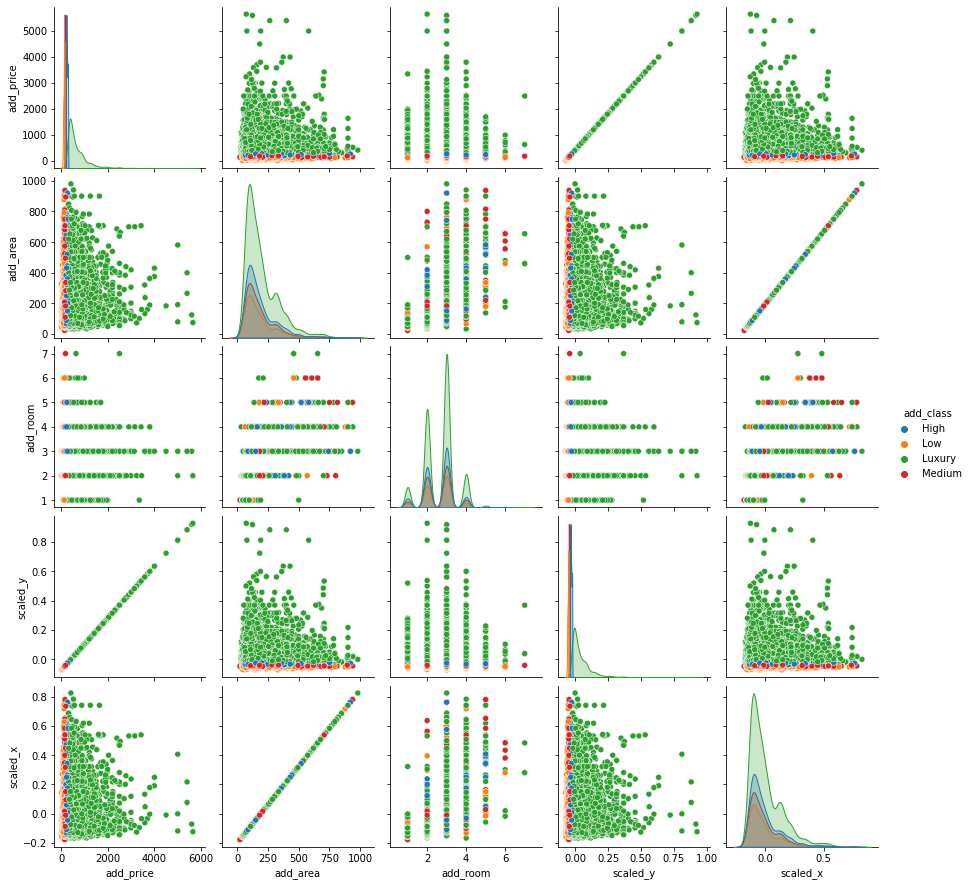

In [321]:
sns.pairplot(df_sectorized, hue="add_class") ### it seem that luxyry is not properly classified

There seem to be more Luxury apartment for selling than the other 3 categories

In [335]:
# test price by class
# sns.pairplot(df_sectorized.loc[df_sectorized["add_class"]=="Luxury"])

### B.1) Min Normalization Scaler

In [163]:
min_price_y = df_sectorized["add_price"].min()
max_price_y = df_sectorized["add_price"].max()
mean_price_y = df_sectorized["add_price"].mean()

min_price_x = df_sectorized["add_area"].min()
max_price_x = df_sectorized["add_area"].max()
mean_price_x = df_sectorized["add_area"].mean()

In [161]:
def mean_norm_scal(row, str, mean_v, min_v, max_v):
    '''Apply min-normalization scale to value
    '''
    row = (row[str] - mean_v)/(max_v - min_v)
    return row

In [164]:
# normalize explanatory and target variables
mean_norm_y = df_sectorized.apply(lambda row: mean_norm_scal(row, "add_price", mean_price_y, min_price_y, max_price_y), axis=1)
mean_norm_x = df_sectorized.apply(lambda row: mean_norm_scal(row, "add_area", mean_price_x, min_price_x, max_price_x), axis=1)

In [167]:
# add normalized/scaled features tu datafram
df_sectorized["scaled_y"] = mean_norm_y
df_sectorized["scaled_x"] = mean_norm_x
df_sectorized.describe()

,add_price,add_area,add_room,scaled_y,scaled_x
count,12080.00000,12080.00000,12080.00000,12080.00000,12080.00000
mean,423.38431,192.19873,2.63974,0.00000,-0.00000
std,405.18207,132.17547,0.78483,0.07187,0.13826
min,12.00000,24.00000,1.00000,-0.07297,-0.17594
25%,185.00000,98.00000,2.00000,-0.04228,-0.09853
50%,295.00000,150.69500,3.00000,-0.02277,-0.04341
75%,500.00000,241.00000,3.00000,0.01359,0.05105
max,5650.00000,980.00000,7.00000,0.92703,0.82406


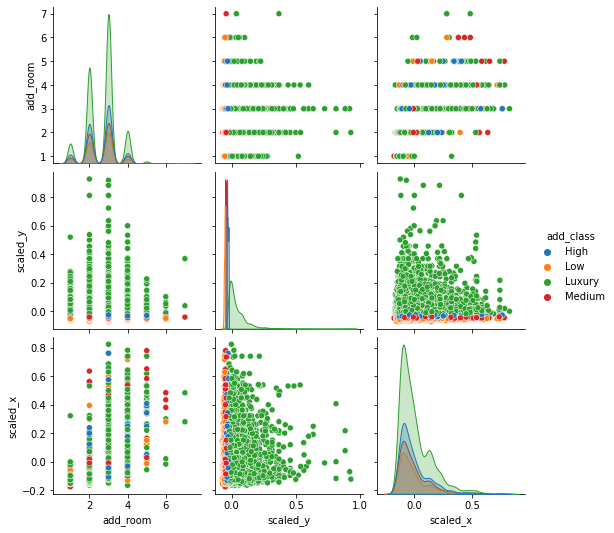

In [170]:
df_scaled = df_sectorized.drop(["add_area", "add_price"], axis = 1)
sns.pairplot(df_scaled, hue="add_class")

# Define Variables and Training Model

In [302]:
X_s = df_scaled[["scaled_x", "add_class"]]
X_s

,scaled_x,add_class
0,-0.11021,High
1,-0.11344,High
2,-0.15372,Low
3,-0.01694,Luxury
4,0.12845,Luxury
...,...,...
12284,-0.00125,Luxury
12285,0.50711,Luxury
12286,0.01757,Medium
12287,-0.04309,High


<AxesSubplot:xlabel='add_class'>

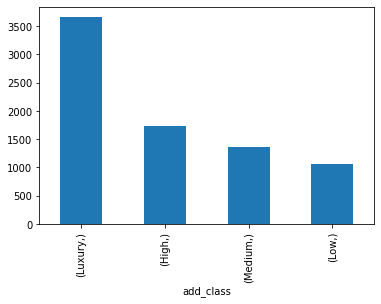

In [311]:
X_s.loc[X_s["scaled_x"] <0]["add_class"].to_frame().value_counts().plot(kind='bar')

<AxesSubplot:>

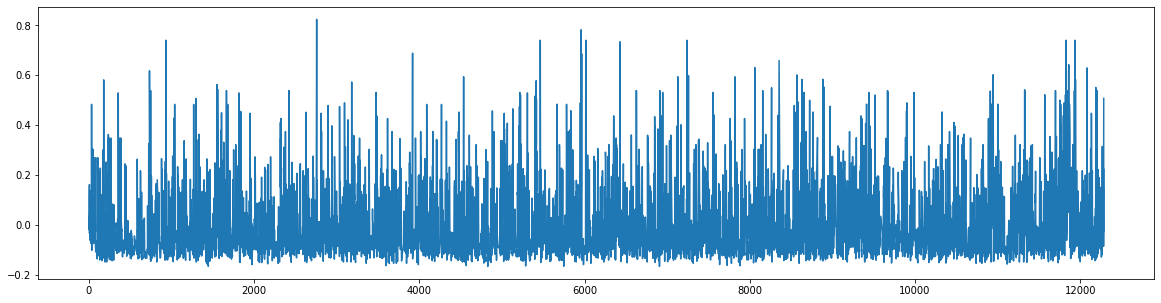

In [320]:
X_s.loc[X_s["add_class"] =="Luxury"]["scaled_x"].plot(figsize = (20, 5))

In [278]:
X_s = pd.get_dummies(data=X_s, drop_first=True)
X_s

,scaled_x,add_class_Low,add_class_Luxury,add_class_Medium
0,-0.11021,0,0,0
1,-0.11344,0,0,0
2,-0.15372,1,0,0
3,-0.01694,0,1,0
4,0.12845,0,1,0
...,...,...,...,...
12284,-0.00125,0,1,0
12285,0.50711,0,1,0
12286,0.01757,0,0,1
12287,-0.04309,0,0,0


In [279]:
y_s = df_scaled["scaled_y"]
y_s

0       -0.02419
1       -0.03483
2       -0.05301
3       -0.00965
4        0.05332
          ...   
12284    0.08196
12285    0.07567
12286   -0.04849
12287   -0.02632
12288   -0.04139
Name: scaled_y, Length: 12080, dtype: float64

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=101)

In [281]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [282]:
print('Training score: {}'.format(model.score(X_train, y_train)))
print('Test score: {}'.format(model.score(X_test, y_test)))

Training score: 0.36069313275201564
Test score: 0.35970467794909866


In [283]:
# print the intercept
print(model.intercept_)

-0.030920332197281398


In [284]:
coeff_parameter = pd.DataFrame(model.coef_,X_s.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
scaled_x,0.01434
add_class_Low,-0.02414
add_class_Luxury,0.07567
add_class_Medium,-0.01361


In [285]:
predictions = model.predict(X_test)
predictions

array([-0.03257365, -0.03193257,  0.04513718, ..., -0.02652742,
       -0.0511183 , -0.05576925])

<AxesSubplot:xlabel='scaled_y'>

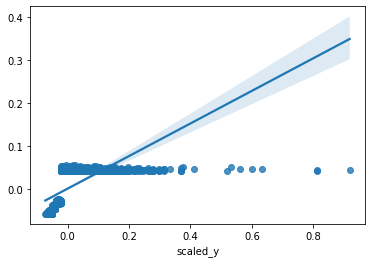

In [286]:
sns.regplot(y_test,predictions)

In [287]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 0.05562536601228778


It seems that for low values the algorithms does poorly predicting housing price. Maybe develop a model for different categories?????

## Try polynomial Regression

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [288]:
X_s = X_s.drop(["add_class"], axis=1)

KeyError: "['add_class'] not found in axis"

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=101)

In [271]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=9)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 0.003976831159655969
Test score: 0.00636339222157789


In [273]:
predictions = pipeline.predict(X_test)
predictions

array([-3.15269625e-03, -8.12274357e-04,  3.31807282e-07, ...,
        9.24544456e-03,  8.58651047e-03, -5.71593537e-04])

<AxesSubplot:xlabel='scaled_y'>

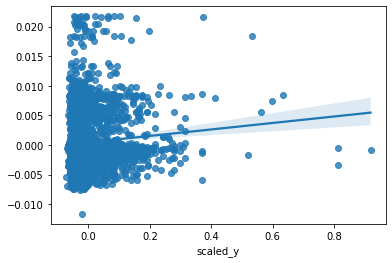

In [274]:
sns.regplot(y_test,predictions)

In [275]:
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 0.06929413996191103
